**AUTHOR SHRUTHI**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv") # Importing the data

In [6]:
df.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df.shape

(25, 2)

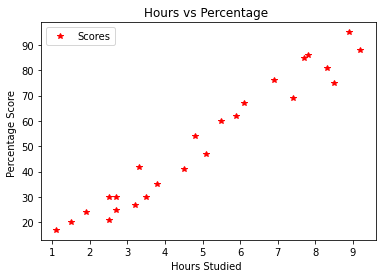

In [8]:
#Visualzing the dataset
df.plot(x='Hours', y='Scores', style='*', color='red')
plt.title('Hours vs Percentage ')  
plt.xlabel('Hours Studied ')  
plt.ylabel('Percentage Score ')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

Preparing the data 

In [9]:
# we can also use .corr to determine the corelation between the variables 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000



Using Scikit-Learn's built-in train_test_split() method: 

In [11]:
# using iloc function we will divide the data 
X = df.iloc[:, :1].values  
y = df.iloc[:, 1:].values

In [12]:
# Splitting data into training and testing data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)   #Ratio 70:30

**Training the Algorithm**

In [13]:
from sklearn.linear_model import LinearRegression  

l = LinearRegression()  
l.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#To print coefficient and intercepts model
l.coef_

array([[9.78856669]])

In [17]:
l.intercept_

array([2.37081538])

Making Predictions

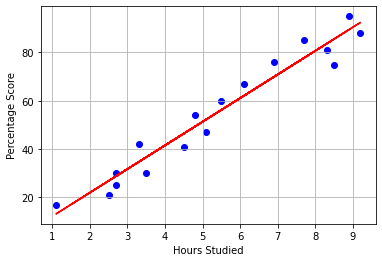

In [18]:
# Plotting the regression line
line = l.coef_*X+l.intercept_

# Plotting for the test data
plt.show()
plt.scatter(X_train, y_train, color='blue')
plt.plot(X, line, color='red');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

In [19]:
print(X_test)
y_pred = l.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [20]:
#Comparing actual and predicated values of a dataframes
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62], [35], [24], [86]]","[[17.053665412465456], [33.69422877993883], [7..."


In [21]:
# You can also test with your own data
hours = 9.25
own_pred = l.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 9.25
Predicted Score = [92.91505723]


In [22]:
from sklearn import metrics  

print('Mean Absolute Error is:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error is: 4.419727808027651
